<a href="https://colab.research.google.com/github/ScienceAnalyst/Python/blob/master/0besidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Datos

[Encuesta Nacional de Salud y Nutricion](https://ensanut.insp.mx/)

Introducción

El archivo de Antropometria contiene la informacion basica de la medicion de cada individuo, por ejemplo talla y peso.

El Dataset elegido, se conforma por las siguientes columnas

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis


df = pd.read_csv("/content/Antropometria.csv", encoding="ISO-8859-1")

df.head()

,folio,intp,entidad,desc_ent,munici,desc_mun,locali,desc_loc,ageb,sexo,edad,intsel,acomp,peso,peso2,ropa,rpeso,talla,talla2,rtalla,emb,temb,cintura,cintura2,rcintura,cadera,cadera2,rcadera,amputa,ppeso,panto,panto2,rpanto,rodilla,rodilla2,rrodilla,hemien,hemien2,rhemien,brazo,brazo2,rbrazo,sistol3,diastol3,pulso3,sistol4,diastol4,pulso4,sistol6,diastol6,pulso6,tbrazo,htension,rtension,region_n,area,est_sel,estrato,hogar_pros,ponde_f,upm,c1
0,01001010617639990011,2,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,106,0106 ARELLANO,1763,2,35,1,1,75.4,75.4,1,1,155.8,155.6,1,4,,104,104,1,,,,,,,,,,,,,,,,,,105,68,60,107,67,63,106,67,64,1,20:00,1,2,2,101,1,1,3084.614391,0100117630000,1
1,01001010617639990011,3,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,106,0106 ARELLANO,1763,2,16,2,1,65.15,65.2,1,1,162,162,1,4,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2,2,101,1,1,1214.642414,0100117630000,1
2,01001010617639990011,4,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,106,0106 ARELLANO,1763,2,2,4,1,10.2,10.2,1,1,92.5,92.5,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2,2,101,1,1,1024.322509,0100117630000,1
3,01001010617639990311,1,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,106,0106 ARELLANO,1763,2,50,1,1,79.3,79.3,1,1,156.8,156.8,1,,,87.4,87.4,1,,,,,,,,,,,,,,,,,,156,100,75,141,100,74,138,100,74,1,13:00,1,2,2,101,1,0,1393.452081,0100117630000,1
4,01001010617639990311,2,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,106,0106 ARELLANO,1763,2,13,2,1,73.85,73.85,1,1,162.5,162.5,1,4,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2,2,101,1,0,1702.060381,0100117630000,1


## Análisis Exploratorio de Datos (EDA)

En parte, analizamos los datos con el fin de conocer su "forma" (distribución) y con base en esto elegir de mejor manera las variables que intervendrán en nuestro modelo.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17224 entries, 0 to 17223
Data columns (total 62 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   folio       17224 non-null  object 
 1   intp        17224 non-null  int64  
 2   entidad     17224 non-null  int64  
 3   desc_ent    17224 non-null  object 
 4   munici      17224 non-null  int64  
 5   desc_mun    17224 non-null  object 
 6   locali      17224 non-null  int64  
 7   desc_loc    17224 non-null  object 
 8   ageb        17224 non-null  object 
 9   sexo        17224 non-null  int64  
 10  edad        17224 non-null  int64  
 11  intsel      17224 non-null  int64  
 12  acomp       17224 non-null  int64  
 13  peso        17224 non-null  object 
 14  peso2       17224 non-null  object 
 15  ropa        17224 non-null  object 
 16  rpeso       17224 non-null  object 
 17  talla       17224 non-null  object 
 18  talla2      17224 non-null  object 
 19  rtalla      17224 non-nul


*   Se puede determinar que el Dataset esta bastante limpio




In [29]:
df['peso'] = pd.to_numeric(df['peso'], errors='coerce')
df['talla'] = pd.to_numeric(df['talla'], errors='coerce')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17224 entries, 0 to 17223
Data columns (total 62 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   folio       17224 non-null  object 
 1   intp        17224 non-null  int64  
 2   entidad     17224 non-null  int64  
 3   desc_ent    17224 non-null  object 
 4   munici      17224 non-null  int64  
 5   desc_mun    17224 non-null  object 
 6   locali      17224 non-null  int64  
 7   desc_loc    17224 non-null  object 
 8   ageb        17224 non-null  object 
 9   sexo        17224 non-null  int64  
 10  edad        17224 non-null  int64  
 11  intsel      17224 non-null  int64  
 12  acomp       17224 non-null  int64  
 13  peso        17133 non-null  float64
 14  peso2       17224 non-null  object 
 15  ropa        17224 non-null  object 
 16  rpeso       17224 non-null  object 
 17  talla       17133 non-null  float64
 18  talla2      17224 non-null  object 
 19  rtalla      17224 non-nul

In [31]:
# Analizamos la tendencia central de todos los campos, tomando en cuentra variables numéricas.
df.describe()

,intp,entidad,munici,locali,sexo,edad,intsel,acomp,peso,talla,region_n,area,est_sel,estrato,hogar_pros,ponde_f,c1
count,17224.000000,17224.000000,17224.000000,17224.000000,17224.000000,17224.000000,17224.000000,17224.000000,17133.000000,17133.000000,17224.000000,17224.000000,17224.000000,17224.000000,17224.000000,17224.000000,17224.0
mean,3.084998,16.956398,75.071702,120.173247,1.571122,25.492452,1.997445,1.049930,49.299375,138.836468,2.966791,1.809220,1696.895262,1.244601,0.800337,3801.664137,1.0
std,1.875061,8.182299,106.262231,320.716118,0.494930,21.715391,1.094923,0.269085,26.796850,27.487603,1.188328,0.392928,818.242859,0.540767,0.399759,10866.868126,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,101.000000,1.000000,0.000000,6.535559,1.0
25%,2.000000,11.000000,14.000000,9.000000,1.000000,8.000000,1.000000,1.000000,24.950000,123.600000,2.000000,2.000000,1101.000000,1.000000,1.000000,693.647562,1.0
50%,3.000000,15.000000,40.000000,32.000000,2.000000,17.000000,2.000000,1.000000,51.900000,147.600000,4.000000,2.000000,1504.000000,1.000000,1.000000,1292.075689,1.0
75%,4.000000,24.000000,93.000000,104.000000,2.000000,41.000000,3.000000,1.000000,67.200000,157.300000,4.000000,2.000000,2401.000000,1.000000,1.000000,2770.715798,1.0
max,16.000000,32.000000,566.000000,4457.000000,2.000000,104.000000,4.000000,11.000000,222.220000,222.200000,4.000000,2.000000,3202.000000,3.000000,1.000000,448951.917446,1.0


In [32]:
p = df['peso']
t = df['talla']

print("Promedio peso: " + str(p.mean()))
print("Mediana peso: " + str(p.median()))
print("Rango peso: " + str(p.max() - p.min()))
print("Desviación Estándar peso: " + str(p.std()))

print("\nPromedio talla: " + str(t.mean()))
print("Mediana talla: " + str(t.median()))
print("Rango talla: " + str(t.max() - t.min()))
print("Desviación Estándar talla: " + str(t.std()))

Promedio peso: 49.2993754742307
Mediana peso: 51.9
Rango peso: 222.22
Desviación Estándar peso: 26.796849993688948

Promedio talla: 138.83646763555825
Mediana talla: 147.6
Rango talla: 222.2
Desviación Estándar talla: 27.48760321160745


##esto nos ayuda a visualizar las mediciones de Promedios Rangos

In [33]:
total_count = len(p)
mean = p.mean()
std = p.std()

bottom = p >= (mean - std) # Todos los que sean mayores a 1 std
top = p <= (mean + std) # Todos los que sean menores a 1 std
filtro = df[bottom & top] # Aplicamos los dos filtros,sólo nos quedan los cercanos al promedio
pt = filtro.shape[0] * 100 / total_count # Sacamos el porcentaje de datos
print("Porcentaje de peso " + str(pt) + "%")

total_count = len(t)
mean = t.mean()
std = t.std()

bottom = t >= (mean - std) # Todos los que sean mayores a 1 std
top = t <= (mean + std) # Todos los que sean menores a 1 std
filtro = df[bottom & top] # Aplicamos los dos filtros,sólo nos quedan los cercanos al promedio
pt = filtro.shape[0] * 100 / total_count # Sacamos el porcentaje de datos
print("Porcentaje talla " + str(pt) + "%")

Porcentaje de peso 63.89921040408732%
Porcentaje talla 73.1072921504877%


Vemos que el 63% de los datos del peso se encuentran cerca del promedio lo cual da pie a entender que tenemos un 40% aproxidamente de valores posiblemente atípicos. Mientras que en talla, tenemos un 73% de datos cerca del promedio, lo cual indica la presencia de pocos valores atípicos.

Para analizar de otra forma la distribución de los datos usamos la asimetría (skweness) y la curtosis (kurtosis).

In [34]:
print(f'Curtosis peso: {kurtosis(p)}')
print(f'Asimetría peso: {skew(p)}')

print(f'Curtosis talla: {kurtosis(t)}')
print(f'Asimetría talla: {skew(t)}')

Curtosis peso: nan
Asimetría peso: nan
Curtosis talla: nan
Asimetría talla: nan


###Revisar el problema de los kurtosis

##Visualizacion de datos trabajar mas para dar las graficas deseadas

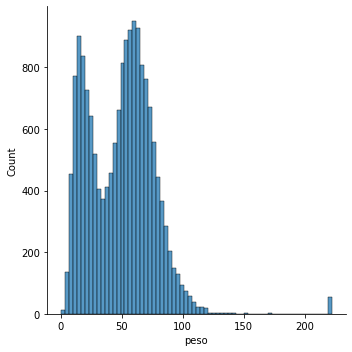

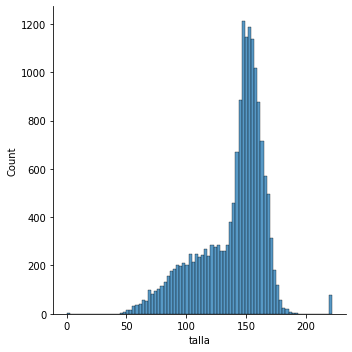

In [35]:
# Histograma de peso y talla
sns.displot(p, kde=False);
sns.displot(t, kde=False);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


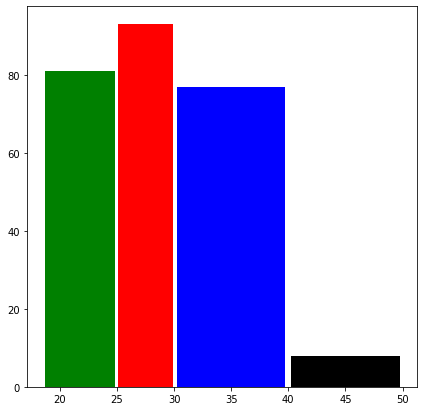

In [36]:
JAL = df.loc[(df['desc_ent']=="14 JALISCO")&(df['edad']>17)]
JAL['IMC']=p/((t*t)/10000)

plt.figure(figsize=(7,7))
#plt.scatter(JAL['edad'], JAL['IMC'], s=100)
#plt.bar(JAL['edad'], JAL['IMC'])
plt.hist(JAL['IMC'], bins=[18.5,25], rwidth=0.95, color='g')
plt.hist(JAL['IMC'], bins=[25,30], rwidth=0.95, color='r')
plt.hist(JAL['IMC'], bins=[30,40], rwidth=0.95, color='b')
plt.hist(JAL['IMC'], bins=[40,50], rwidth=0.95, color='black')
plt.show()

estados y genero

Valores Atipicos

##Análisis de Correlación
Para analizar la correlación entre todas las variables (numéricas) y el rating que se le dio al cereal, usaremos tres técnicas:

Gráfica de dispersión
Matriz de correlación
Mapa de calor.

In [37]:
# Buscamos variables no categóricas.
df.columns

Index(['folio', 'intp', 'entidad', 'desc_ent', 'munici', 'desc_mun', 'locali',
       'desc_loc', 'ageb', 'sexo', 'edad', 'intsel', 'acomp', 'peso', 'peso2',
       'ropa', 'rpeso', 'talla', 'talla2', 'rtalla', 'emb', 'temb', 'cintura',
       'cintura2', 'rcintura', 'cadera', 'cadera2', 'rcadera', 'amputa',
       'ppeso', 'panto', 'panto2', 'rpanto', 'rodilla', 'rodilla2', 'rrodilla',
       'hemien', 'hemien2', 'rhemien', 'brazo', 'brazo2', 'rbrazo', 'sistol3',
       'diastol3', 'pulso3', 'sistol4', 'diastol4', 'pulso4', 'sistol6',
       'diastol6', 'pulso6', 'tbrazo', 'htension', 'rtension', 'region_n',
       'area', 'est_sel', 'estrato', 'hogar_pros', 'ponde_f', 'upm', 'c1'],
      dtype='object')

In [38]:
numericas = df[['entidad', 'sexo', 'talla', 'peso']]
numericas.head()

,entidad,sexo,talla,peso
0,1,2,155.8,75.40
1,1,2,162.0,65.15
2,1,2,92.5,10.20
3,1,2,156.8,79.30
4,1,2,162.5,73.85


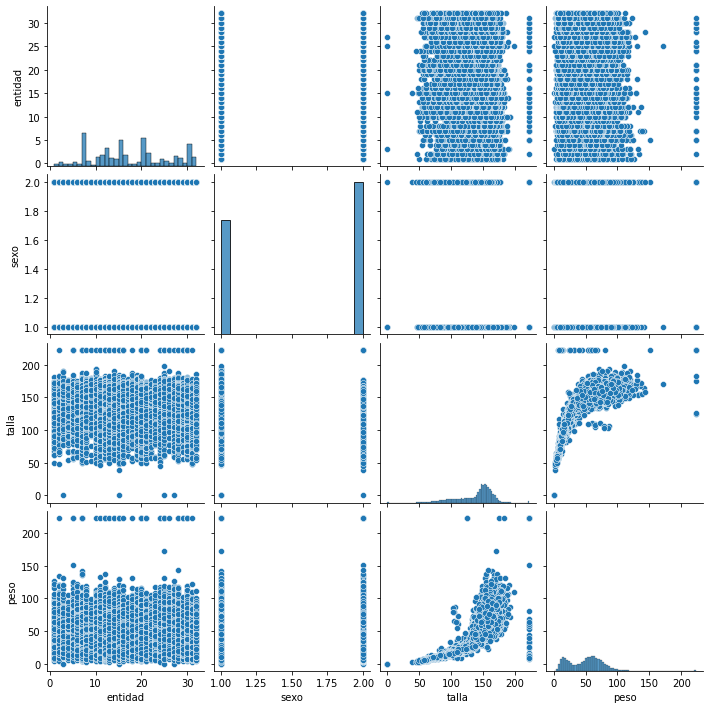

In [39]:
sns.pairplot(numericas);

In [40]:
numericas.corr()

,entidad,sexo,talla,peso
entidad,1.000000,-0.000259,0.027992,0.035603
sexo,-0.000259,1.000000,-0.027043,0.042336
talla,0.027992,-0.027043,1.000000,0.831723
peso,0.035603,0.042336,0.831723,1.000000


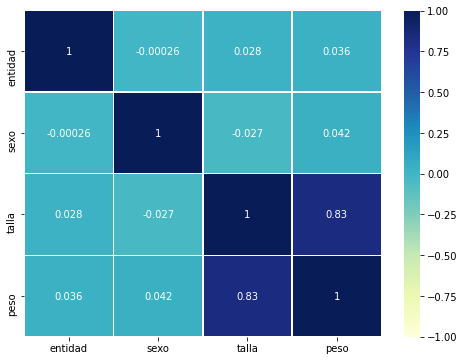

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(numericas.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);